In [2]:
import sys
print("Python version:", sys.version)

import tensorflow as tf
print("TensorFlow version:", tf.__version__)

Python version: 3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]
TensorFlow version: 2.11.0


In [3]:
from analysis.network_analysis import *

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [4]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from network.network import *
from network.data_loader import *

In [6]:
NUM_WORDS = 10000

(X_train, Y_train), (X_test, Y_test) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

In [7]:
def multi_hot_sequences(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
      results[i, word_indices] = 1.0
    return results

In [8]:
X_train = multi_hot_sequences(X_train, dimension=NUM_WORDS)
X_test = multi_hot_sequences(X_test, dimension=NUM_WORDS)

In [9]:
X_train.shape

(25000, 10000)

In [10]:
# well_fitted_model = create_wellfitted_model(DataType.IMDB)
# overfitted_model = create_overfitted_model(DataType.IMDB)
# underfitted_model = create_underfitted_model(DataType.IMDB)

In [9]:
from keras import regularizers

underfitted_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, kernel_regularizer=regularizers.l2(0.1), input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.7),
    keras.layers.Dense(4, activation=tf.nn.relu, kernel_regularizer=regularizers.l2(0.1)),
    keras.layers.Dropout(0.7),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

underfitted_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy', 'binary_crossentropy'])

underfitted_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 40004     
                                                                 
 dropout (Dropout)           (None, 4)                 0         
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dropout_1 (Dropout)         (None, 4)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [10]:
underfitted_history = underfitted_model.fit(X_train,
                                   Y_train,
                                   epochs=100,
                                   batch_size=512,
                                   validation_data=(X_test, Y_test),
                                   verbose=2)

Epoch 1/100
49/49 - 20s - loss: 1.3387 - accuracy: 0.5063 - binary_crossentropy: 0.6924 - val_loss: 1.1665 - val_accuracy: 0.7318 - val_binary_crossentropy: 0.6856 - 20s/epoch - 410ms/step
Epoch 2/100
49/49 - 2s - loss: 1.1289 - accuracy: 0.5167 - binary_crossentropy: 0.6859 - val_loss: 1.0925 - val_accuracy: 0.8181 - val_binary_crossentropy: 0.6849 - 2s/epoch - 47ms/step
Epoch 3/100
49/49 - 1s - loss: 1.0632 - accuracy: 0.5173 - binary_crossentropy: 0.6858 - val_loss: 1.0309 - val_accuracy: 0.8139 - val_binary_crossentropy: 0.6837 - 1s/epoch - 27ms/step
Epoch 4/100
49/49 - 1s - loss: 1.0075 - accuracy: 0.5159 - binary_crossentropy: 0.6866 - val_loss: 0.9788 - val_accuracy: 0.8106 - val_binary_crossentropy: 0.6838 - 1s/epoch - 24ms/step
Epoch 5/100
49/49 - 1s - loss: 0.9587 - accuracy: 0.5162 - binary_crossentropy: 0.6865 - val_loss: 0.9352 - val_accuracy: 0.7844 - val_binary_crossentropy: 0.6855 - 1s/epoch - 26ms/step
Epoch 6/100
49/49 - 1s - loss: 0.9173 - accuracy: 0.5148 - binary_c

In [11]:
overfitted_model = keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.00004)

overfitted_model.compile(optimizer=optimizer,
                    loss='binary_crossentropy',
                    metrics=['accuracy', 'binary_crossentropy'])

overfitted_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               5120512   
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dense_5 (Dense)             (None, 1)                 513       
                                                                 
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [12]:
overfitted_history = overfitted_model.fit(X_train,
                                   Y_train,
                                   epochs=100,
                                   batch_size=512,
                                   validation_data=(X_test, Y_test),
                                   verbose=1)


Epoch 1/100
49/49 [==============================] - 17s 312ms/step - loss: 0.6518 - accuracy: 0.7178 - binary_crossentropy: 0.6518 - val_loss: 0.5972 - val_accuracy: 0.7975 - val_binary_crossentropy: 0.5972
Epoch 2/100
49/49 [==============================] - 8s 156ms/step - loss: 0.4927 - accuracy: 0.8430 - binary_crossentropy: 0.4927 - val_loss: 0.4218 - val_accuracy: 0.8492 - val_binary_crossentropy: 0.4218
Epoch 3/100
49/49 [==============================] - 7s 144ms/step - loss: 0.3325 - accuracy: 0.8847 - binary_crossentropy: 0.3325 - val_loss: 0.3279 - val_accuracy: 0.8766 - val_binary_crossentropy: 0.3279
Epoch 4/100
49/49 [==============================] - 7s 143ms/step - loss: 0.2517 - accuracy: 0.9110 - binary_crossentropy: 0.2517 - val_loss: 0.2950 - val_accuracy: 0.8859 - val_binary_crossentropy: 0.2950
Epoch 5/100
49/49 [==============================] - 7s 143ms/step - loss: 0.2073 - accuracy: 0.9278 - binary_crossentropy: 0.2073 - val_loss: 0.2839 - val_accuracy: 0.887

In [13]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

wellfitted_model = keras.Sequential([
    keras.layers.Dense(32, kernel_regularizer=keras.regularizers.l1(0.001),
                      activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l1(0.001),
                      activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(8, kernel_regularizer=keras.regularizers.l1(0.001),
                      activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

optimizer = keras.optimizers.Adam(learning_rate=0.0001)

wellfitted_model.compile(optimizer=optimizer,
                     loss='binary_crossentropy',
                     metrics=['accuracy', 'binary_crossentropy'])

wellfitted_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                320032    
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dense_8 (Dense)             (None, 8)                 136       
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 320,705
Trainable params: 320,705
Non-tr

In [14]:
wellfitted_history =  wellfitted_model.fit(X_train,
                                   Y_train,
                                   epochs=100,
                                   batch_size=512,
                                   validation_data=(X_test, Y_test),
                                   verbose=2,
                                          callbacks=[early_stopping])

Epoch 1/100
49/49 - 10s - loss: 4.0428 - accuracy: 0.5048 - binary_crossentropy: 0.6933 - val_loss: 3.3670 - val_accuracy: 0.5572 - val_binary_crossentropy: 0.6896 - 10s/epoch - 212ms/step
Epoch 2/100
49/49 - 2s - loss: 2.8173 - accuracy: 0.5528 - binary_crossentropy: 0.6853 - val_loss: 2.2850 - val_accuracy: 0.6537 - val_binary_crossentropy: 0.6737 - 2s/epoch - 43ms/step
Epoch 3/100
49/49 - 2s - loss: 1.8785 - accuracy: 0.6244 - binary_crossentropy: 0.6659 - val_loss: 1.4881 - val_accuracy: 0.7794 - val_binary_crossentropy: 0.6428 - 2s/epoch - 41ms/step
Epoch 4/100
49/49 - 2s - loss: 1.2301 - accuracy: 0.6771 - binary_crossentropy: 0.6394 - val_loss: 0.9876 - val_accuracy: 0.8146 - val_binary_crossentropy: 0.6144 - 2s/epoch - 41ms/step
Epoch 5/100
49/49 - 2s - loss: 0.8760 - accuracy: 0.7088 - binary_crossentropy: 0.6176 - val_loss: 0.7764 - val_accuracy: 0.8218 - val_binary_crossentropy: 0.5900 - 2s/epoch - 36ms/step
Epoch 6/100
49/49 - 2s - loss: 0.7729 - accuracy: 0.7318 - binary_c

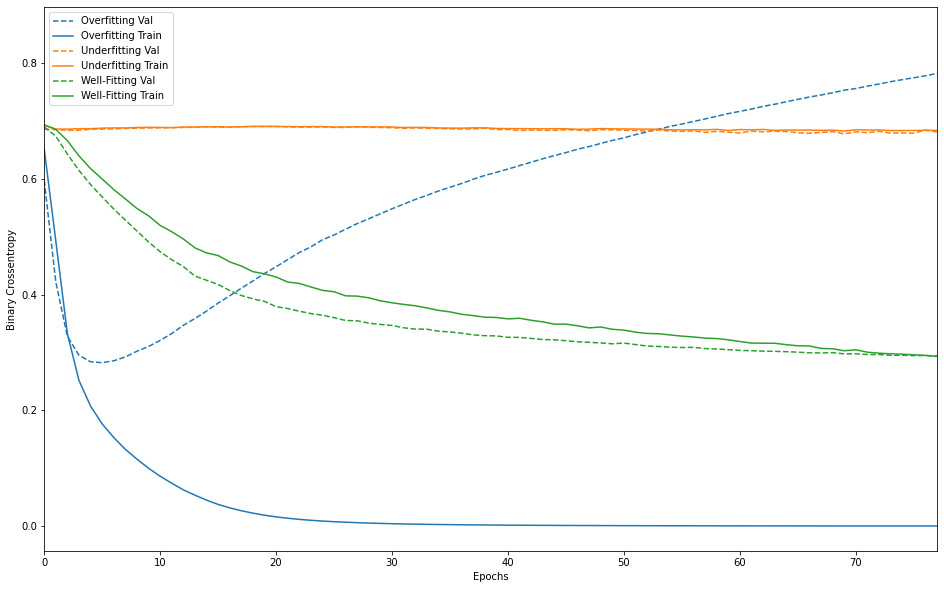

In [16]:
def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16,10))

    for name, history in histories:
        val =  plt.plot(history.epoch, history.history['val_' + key],
                       '--', label=name.title() + ' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                 label=name.title() + ' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_', ' ').title())
    plt.legend()

    plt.xlim([0, max(history.epoch)])

plot_history([('overfitting', overfitted_history),
             ('underfitting', underfitted_history),
             ('well-fitting', wellfitted_history)])

In [11]:
train_model(underfitted_model, 512, 100,  'underfitted_model', X_train, Y_train)

Epoch 1/100
39/41 [===========================>..] - ETA: 0s - loss: 1.1769 - accuracy: 0.5030 - binary_crossentropy: 0.6932
Epoch 1: saving model to ./generated/model/underfitted_model\underfitted_model_100_1.hdf5
41/41 [==============================] - 3s 33ms/step - loss: 1.1700 - accuracy: 0.5014 - binary_crossentropy: 0.6932 - val_loss: 1.0040 - val_accuracy: 0.7324 - val_binary_crossentropy: 0.6906
Epoch 2/100
40/41 [============================>.] - ETA: 0s - loss: 0.9766 - accuracy: 0.5363 - binary_crossentropy: 0.6870
Epoch 2: saving model to ./generated/model/underfitted_model\underfitted_model_100_2.hdf5
41/41 [==============================] - 1s 19ms/step - loss: 0.9763 - accuracy: 0.5359 - binary_crossentropy: 0.6871 - val_loss: 0.9471 - val_accuracy: 0.6076 - val_binary_crossentropy: 0.6816
Epoch 3/100
38/41 [==========================>...] - ETA: 0s - loss: 0.9323 - accuracy: 0.5385 - binary_crossentropy: 0.6861
Epoch 3: saving model to ./generated/model/underfitted_mo

INFO:tensorflow:Assets written to: ./generated/model/underfitted_model_100\assets


INFO:tensorflow:Assets written to: ./generated/model/underfitted_model_100\assets


In [12]:
train_model(overfitted_model, 512, 100,  'overfitted_model', X_train, Y_train)

Epoch 1/100
41/41 [==============================] - ETA: 0s - loss: 0.6603 - accuracy: 0.6901 - binary_crossentropy: 0.6603
Epoch 1: saving model to ./generated/model/overfitted_model\overfitted_model_100_1.hdf5
41/41 [==============================] - 7s 142ms/step - loss: 0.6603 - accuracy: 0.6901 - binary_crossentropy: 0.6603 - val_loss: 0.6158 - val_accuracy: 0.7804 - val_binary_crossentropy: 0.6158
Epoch 2/100
41/41 [==============================] - ETA: 0s - loss: 0.5333 - accuracy: 0.8313 - binary_crossentropy: 0.5333
Epoch 2: saving model to ./generated/model/overfitted_model\overfitted_model_100_2.hdf5
41/41 [==============================] - 5s 114ms/step - loss: 0.5333 - accuracy: 0.8313 - binary_crossentropy: 0.5333 - val_loss: 0.4686 - val_accuracy: 0.8363 - val_binary_crossentropy: 0.4686
Epoch 3/100
41/41 [==============================] - ETA: 0s - loss: 0.3789 - accuracy: 0.8729 - binary_crossentropy: 0.3789
Epoch 3: saving model to ./generated/model/overfitted_model

INFO:tensorflow:Assets written to: ./generated/model/overfitted_model_100\assets


INFO:tensorflow:Assets written to: ./generated/model/overfitted_model_100\assets


In [13]:
train_model(well_fitted_model, 512, 100,  'wellfitted_model', X_train, Y_train)

Epoch 1/100
40/41 [============================>.] - ETA: 0s - loss: 4.1516 - accuracy: 0.5198 - binary_crossentropy: 0.6923
Epoch 1: saving model to ./generated/model/wellfitted_model\wellfitted_model_100_1.hdf5
41/41 [==============================] - 3s 34ms/step - loss: 4.1420 - accuracy: 0.5190 - binary_crossentropy: 0.6924 - val_loss: 3.5514 - val_accuracy: 0.5421 - val_binary_crossentropy: 0.6918
Epoch 2/100
40/41 [============================>.] - ETA: 0s - loss: 3.0721 - accuracy: 0.5380 - binary_crossentropy: 0.6906
Epoch 2: saving model to ./generated/model/wellfitted_model\wellfitted_model_100_2.hdf5
41/41 [==============================] - 1s 32ms/step - loss: 3.0641 - accuracy: 0.5388 - binary_crossentropy: 0.6906 - val_loss: 2.5789 - val_accuracy: 0.6415 - val_binary_crossentropy: 0.6867
Epoch 3/100
39/41 [===========================>..] - ETA: 0s - loss: 2.2103 - accuracy: 0.5735 - binary_crossentropy: 0.6854
Epoch 3: saving model to ./generated/model/wellfitted_model\w

INFO:tensorflow:Assets written to: ./generated/model/wellfitted_model_100\assets


INFO:tensorflow:Assets written to: ./generated/model/wellfitted_model_100\assets


In [17]:
def get_weights(model, dic):
    for layer in range(len(model.layers)):
        if layer == 0:
            dic[layer] = model.layers[layer].get_weights()[0].flatten()
        if layer == len(model.layers)-1:
            dic[-1] = model.layers[layer].get_weights()[0].flatten()

In [18]:
overfitted_layers = {}
get_weights(overfitted_model, overfitted_layers)

In [19]:
underfitted_layers = {}
get_weights(underfitted_model, underfitted_layers)

In [20]:
wellfitted_layers = {}
get_weights(wellfitted_model, wellfitted_layers)

In [21]:
from scipy.stats import norm

def create_plot(i):
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))

    axes[0].hist(overfitted_layers[i], bins=30, density=True)
    axes[0].set_title('Overfitted model - Output Layer Weights')

    axes[1].hist(underfitted_layers[i], bins=30, density=True)
    axes[1].set_title('Underfitted model - Output Layer Weights')

    axes[2].hist(wellfitted_layers[i], bins=30, density=True)
    axes[2].set_title('Wellfitted model- Output Layer Weights')

    x = np.linspace(min(overfitted_layers[i]), max(overfitted_layers[i]), 100)
    y_model1 = norm.pdf(x, np.mean(overfitted_layers[i]), np.std(overfitted_layers[i]))
    axes[0].plot(x, y_model1, label='Overfitted model')

    y_model2 = norm.pdf(x, np.mean(underfitted_layers[i]), np.std(underfitted_layers[i]))
    axes[1].plot(x, y_model2, label='Underfitted model')

    y_model3 = norm.pdf(x, np.mean(wellfitted_layers[i]), np.std(wellfitted_layers[i]))
    axes[2].plot(x, y_model3, label='Wellfitted model')

    for ax in axes:
        ax.legend()

    plt.subplots_adjust(wspace=0.9)

    if i == 0:
        fig.suptitle('Weight distributions for models in the first layer', fontsize=17, y=1.05)
    else:
        fig.suptitle('Weight distributions for models in the last layer', fontsize=17, y=1.05)

    plt.show()

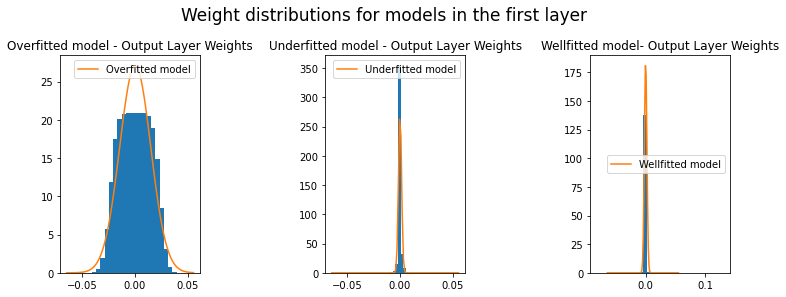

In [22]:
create_plot(0)

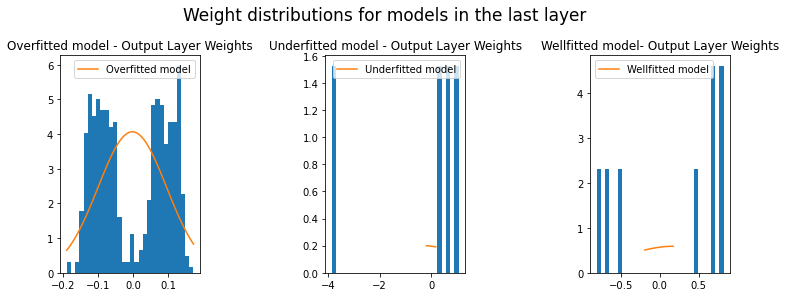

In [23]:
create_plot(-1)

## INTER-LAYER EVOLUTION

The function show_seq_projections performs a data projection analysis using the t-SNE algorithm for a specified model, layer, epoch, and data size, and then displays the results on a plot.

Through these projections, we can gain deeper insights into the structure of the data in different layers by observing how the data evolves and changes across various layers of the neural network. If the data projections from successive layers form structures that are close or similar, it can be inferred that information is being transmitted and processed consistently across consecutive layers. If the projections are scattered or separated, it may indicate discrepancies in data processing between the layers.

Additionally, by coloring the points on the projection plot based on their assigned classes, we can see how well the data from different classes are separated in the two-dimensional space.

### Overfitting

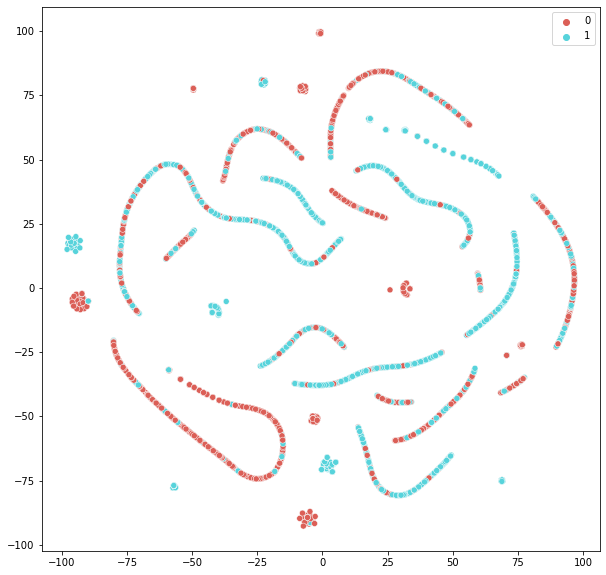

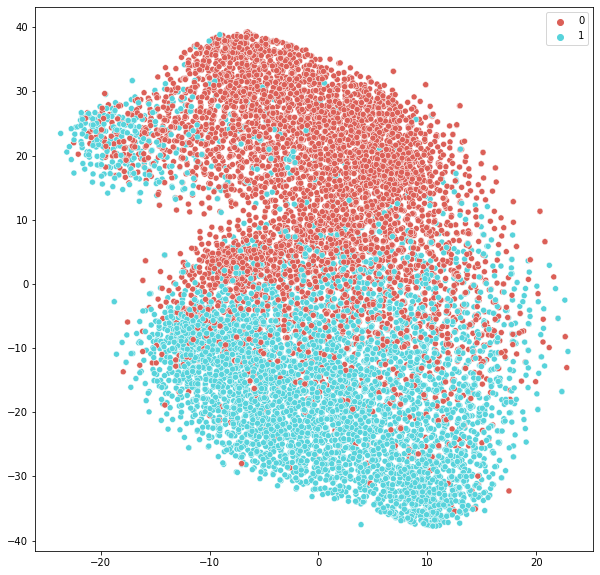

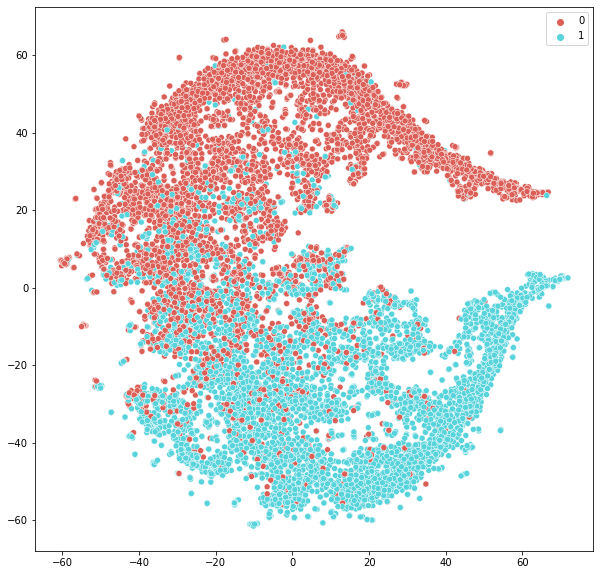

In [17]:
N = 3
points_list_o = []
for n in range(0, N):
    points_o, targets_o = show_seq_projections(DataType.IMDB, 'overfitted_model',n_layer=n, epoch=100, size=10000)
    points_list_o.append(points_o)

### Underfitting

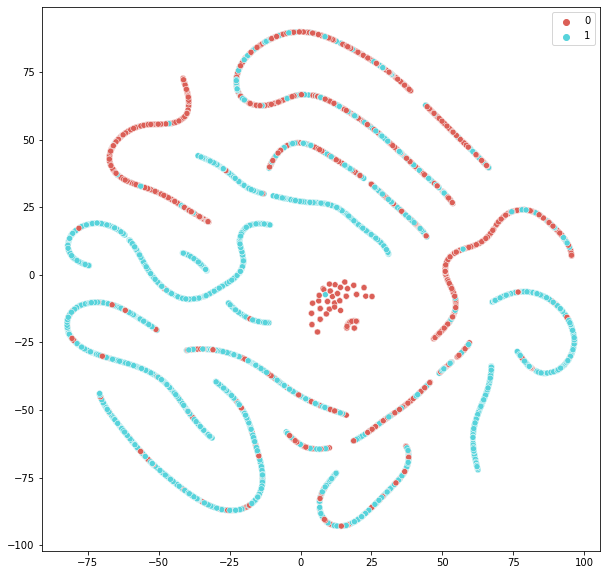

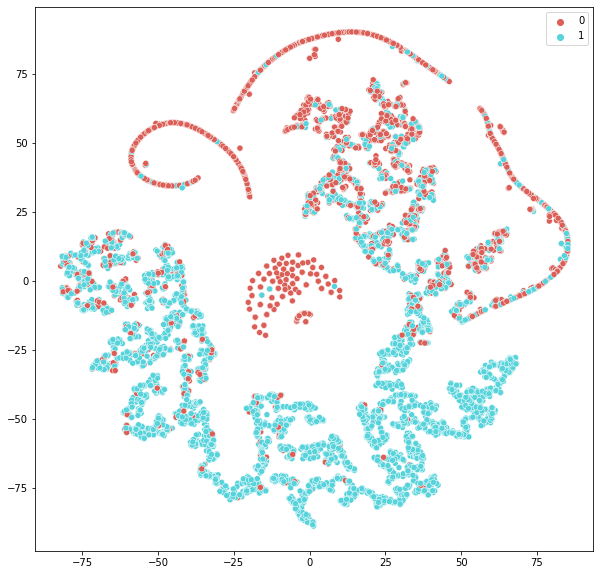

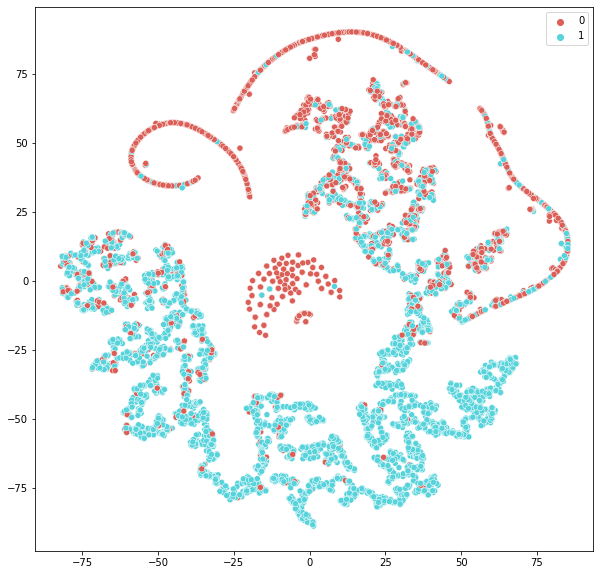

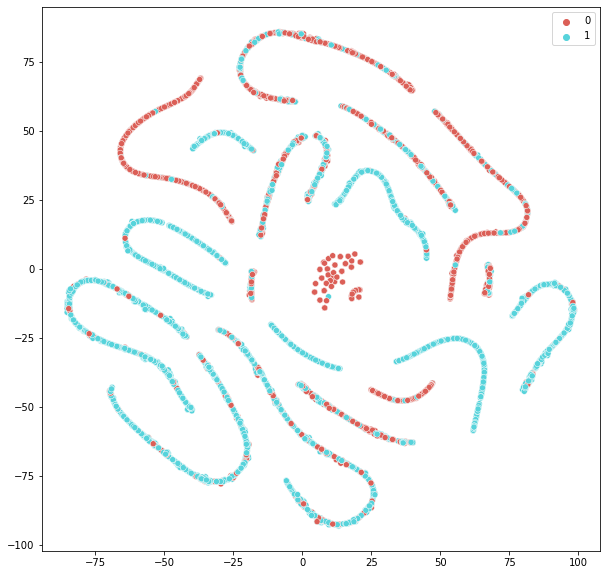

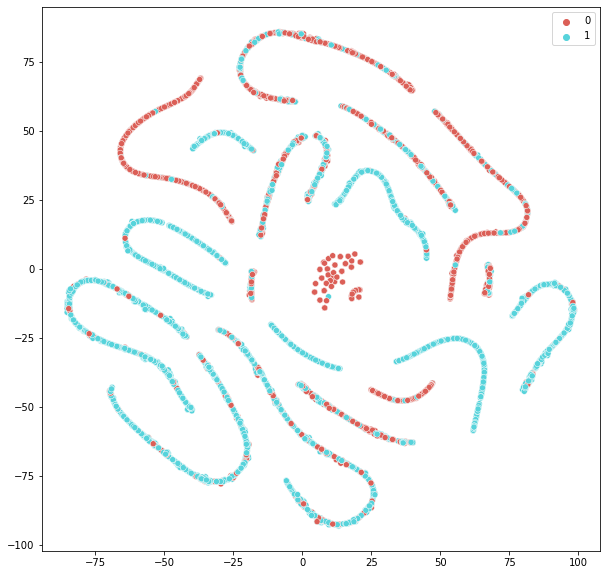

In [20]:
N = 5
points_list_u = []
for n in range(0, N):
    points_u, targets_u = show_seq_projections(DataType.IMDB, 'underfitted_model',n_layer=n, epoch=100, size=10000)
    points_list_u.append(points_u)

### Well-fitting

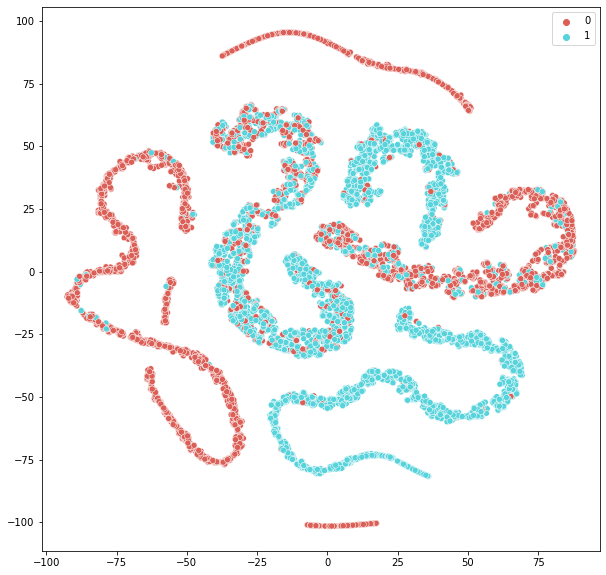

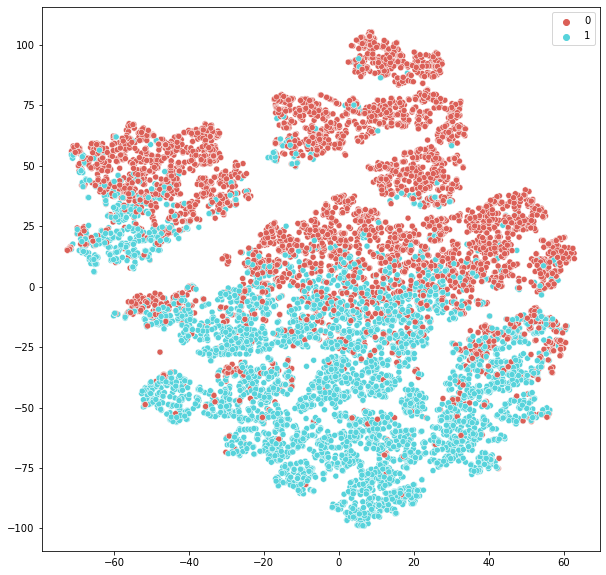

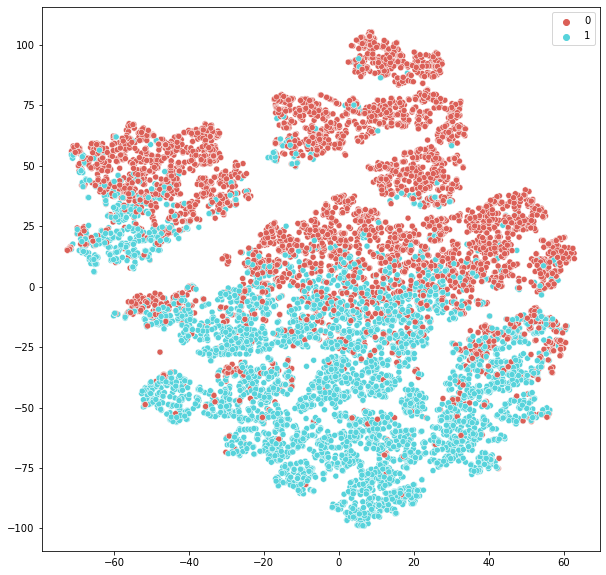

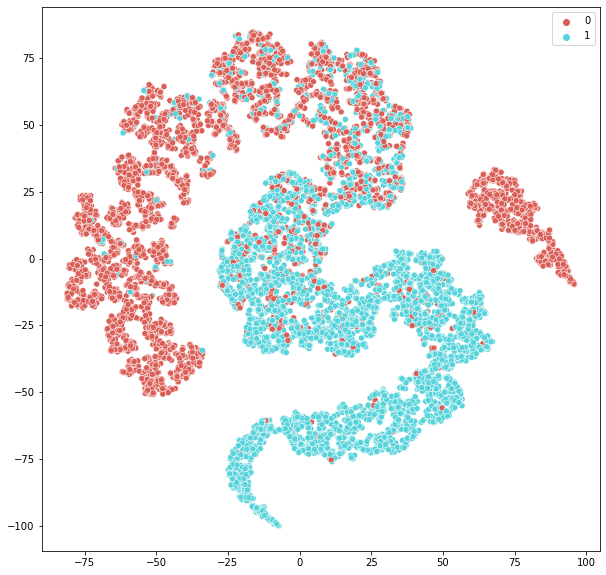

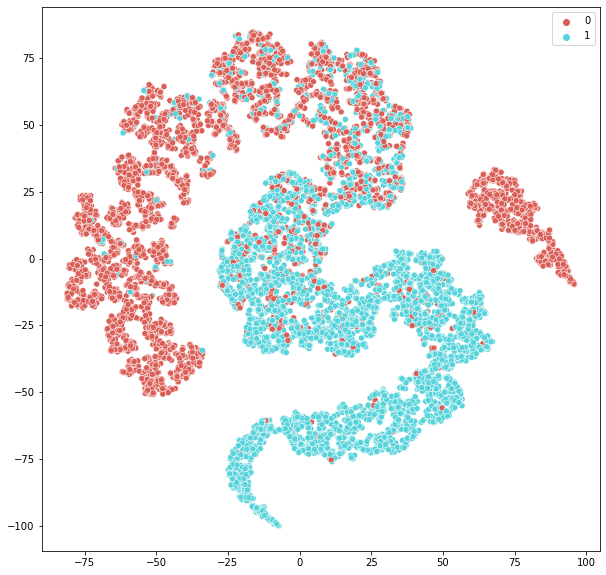

In [21]:
N = 5
points_list_w = []
for n in range(0, N):
    points_w, targets_w = show_seq_projections(DataType.IMDB, 'wellfitted_model',n_layer=n, epoch=100, size=10000)
    points_list_w.append(points_w)

### OVERFITTING

The function aims to show how activations evolve between layers of a model, providing insights into the information flow during data processing by the neural network. These projections allow us to infer the degree of correlation between data in one layer and the data in the subsequent layer. Strong correlations between layers indicate a robust information transfer between them, suggesting coherence and efficient data processing within the network.

Additionally, by analyzing the structure of the graph based on correlations between activations, we can identify which layers have a stronger influence on the data representation. If there are many edges between two consecutive layers, it indicates that activations in those layers are highly correlated, suggesting that data processing is continued and developed across the network.

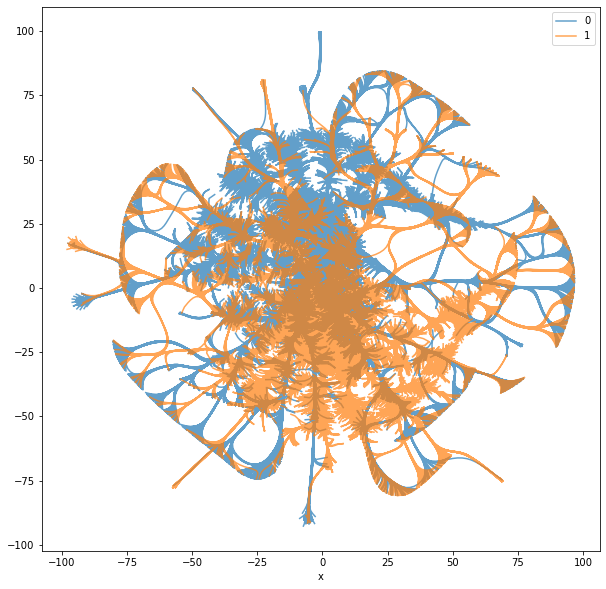

In [22]:
inter_layer_evolution(points_list_o, targets_o)

### WELL-FITTING

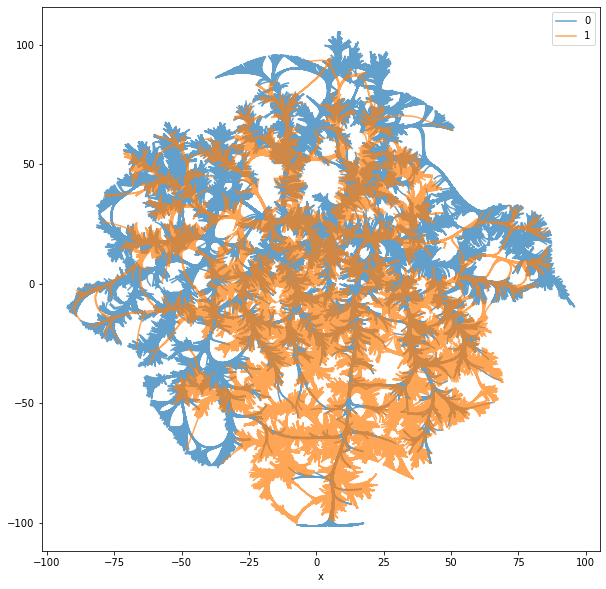

In [23]:
inter_layer_evolution(points_list_w, targets_w)

### UNDERFITTING

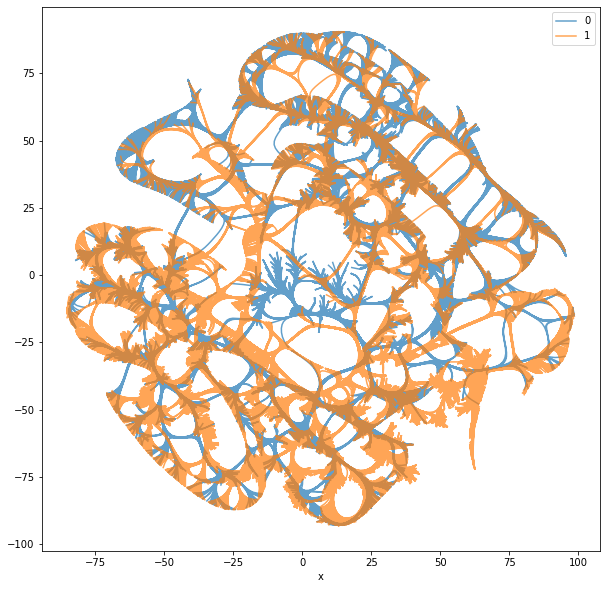

In [24]:
inter_layer_evolution(points_list_u, targets_u)

## Point evolution trace

The plot generated by the show_trace function illustrates the evolution paths of data points in consecutive stages. Each path represents the trajectory of an individual point in the two-dimensional space across different stages. This plot can help us understand how data points change their positions over time and how they are processed by the model.

By observing the paths on the plot, we can see how data points move in space across consecutive stages. If the paths of points are smooth and exhibit specific patterns, it may indicate an effective data transformation by the model. On the other hand, if the paths are chaotic or independent of each other, it may suggest a lack of coherence or inefficiency in data processing.

### OVERFITTING

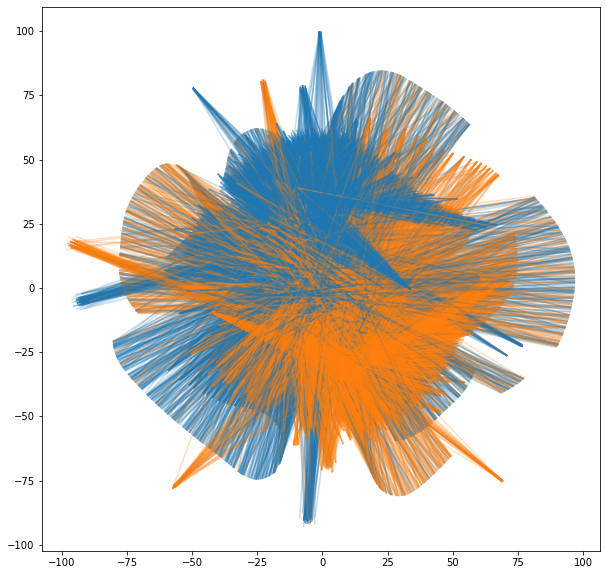

In [25]:
show_trace(points_list_o, targets_o)

### WELLFITTING

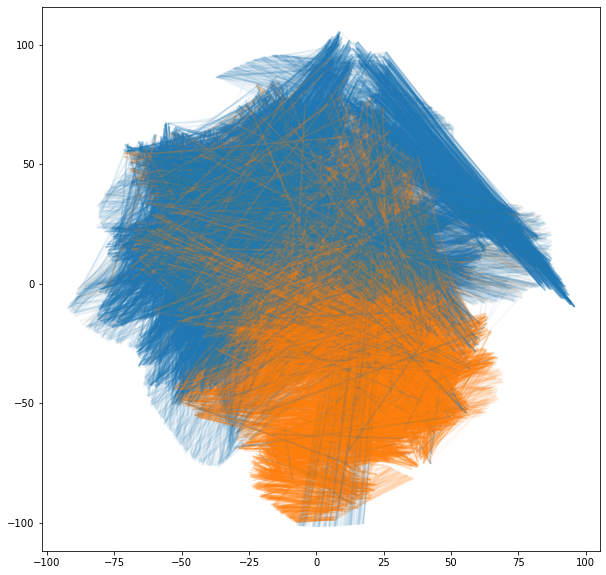

In [26]:
show_trace(points_list_w, targets_w)

### UNDERFITTING

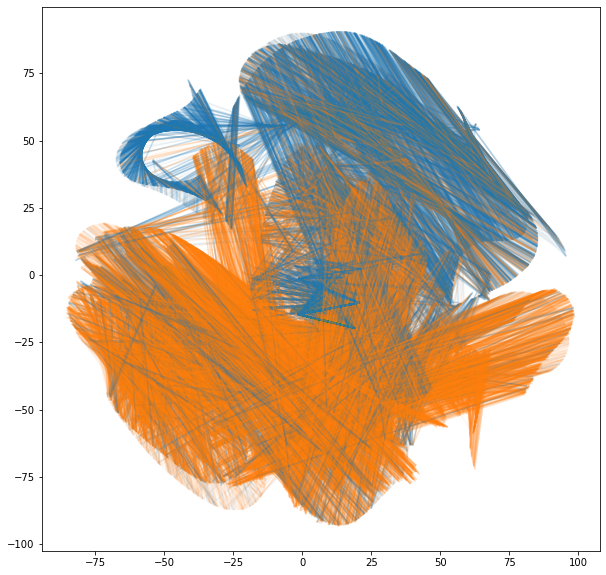

In [27]:
show_trace(points_list_u, targets_u)

## INTER EPOCH EVOLUTION AND PROCESS ACTIVATIONS

The plot generated by process_activations can help analyze the transformations of data space in a specific layer and for a selected model.

By analyzing the clusters or groups of points on the plot, one can observe if there are distinct patterns in the data space. Clusters can indicate similarity or dependency among points with similar characteristics. If points from different classes are tightly separated, it indicates that the model has effectively learned to differentiate between different classes in that layer.

### Overfitting

In [28]:
points_o, targets_o = get_all_activations(DataType.IMDB, 'overfitted_model', n_layer=3, size=10000)

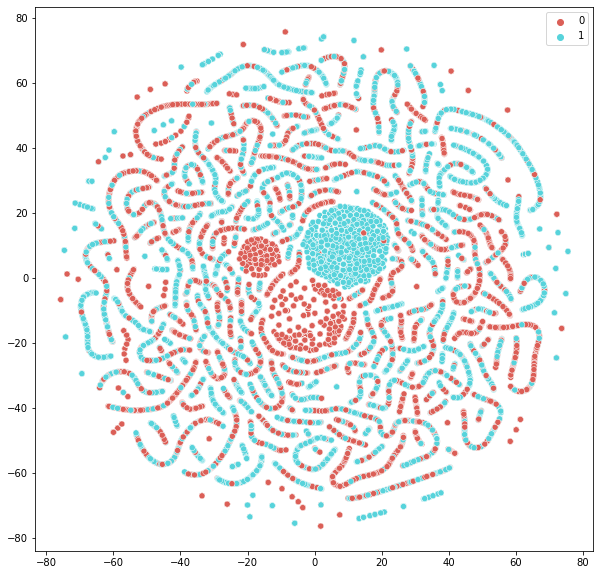

In [29]:
points_o, targets_o = process_activations(points_o, targets_o, size=10000)

The aim of the inter_epoch_evolution function is to visualize the evolution of points between consecutive epochs on a plot using a correlation-based graph. This allows us to depict the patterns of spatial changes in points across successive epochs of the model and observe their evolution visually.

The function utilizes a graph based on correlations between points to represent the relationships between them. By analyzing this graph, we can identify the patterns of spatial changes that occur in the points as the epochs progress. Visualizing the evolution of points between epochs provides insights into how the spatial characteristics of the points transform over time in the model.

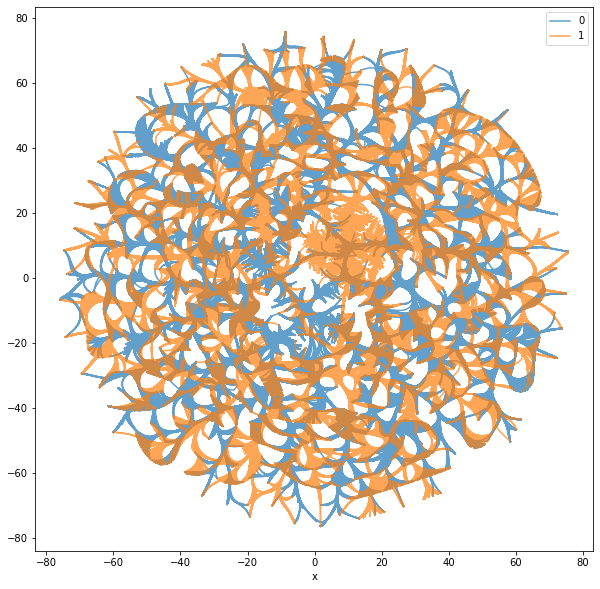

In [30]:
inter_epoch_evolution(points_o, targets_o)

### Well-fitting

In [31]:
points_w, targets_w = get_all_activations(DataType.IMDB, 'wellfitted_model', n_layer=3, size=10000)

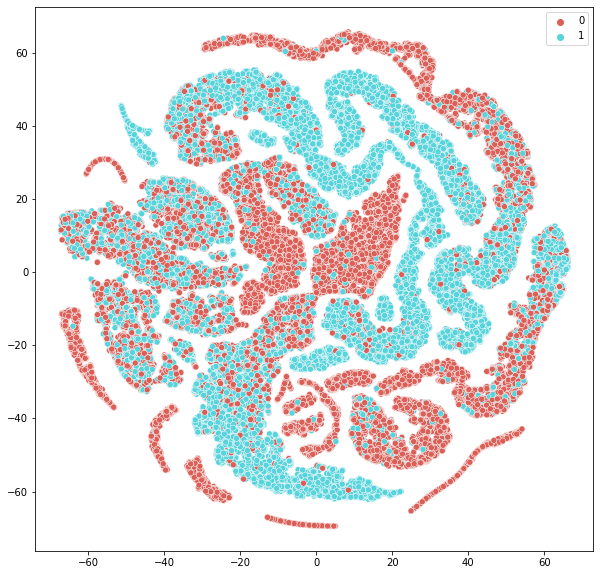

In [32]:
points_w, targets_w = process_activations(points_w, targets_w, size=10000)

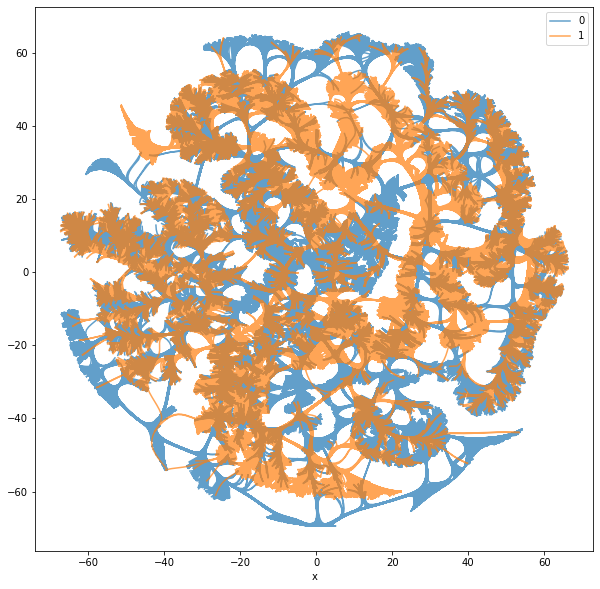

In [33]:
inter_epoch_evolution(points_w, targets_w)

### Underfitting

In [34]:
points_u, targets_u = get_all_activations(DataType.IMDB, 'underfitted_model', n_layer=3, size=10000)

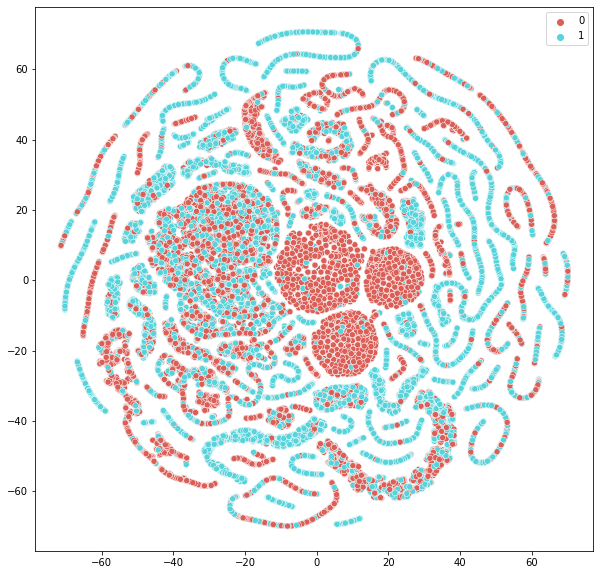

In [35]:
points_u, targets_u = process_activations(points_u, targets_u, size=10000)

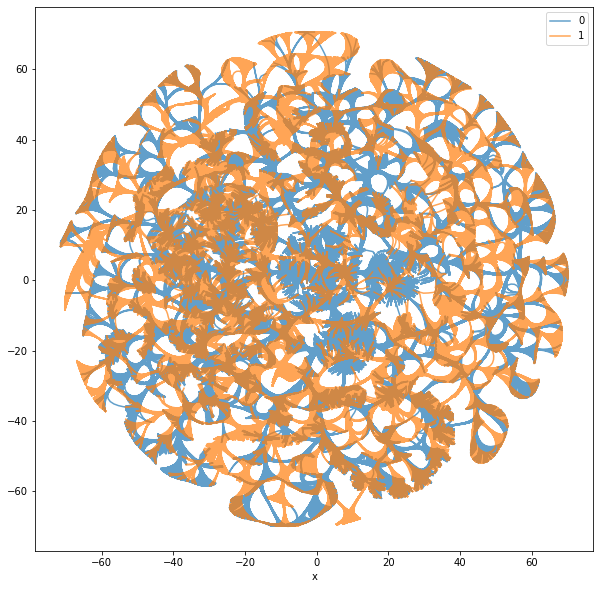

In [36]:
inter_epoch_evolution(points_u, targets_u)